In [196]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [198]:
df_all = pd.read_csv('../../data/fanfic_regression_data_20211216_topic_only_no_crossover.tsv', sep = '\t')

In [199]:
len(df_all)

540992

In [200]:
df_all['Topic_novelty'].head()

0    0.245356
1    0.165296
2    0.598657
3    0.197402
4    0.594861
Name: Topic_novelty, dtype: float64

In [201]:
topic_ave = np.average(df_all['Topic_novelty'])
df_all['Topic_novelty_cent'] = df_all['Topic_novelty'] - topic_ave
df_all['Topic_novelty_squared'] = np.square(df_all['Topic_novelty_cent'])

In [202]:
len(df_all)

540992

In [203]:
df_all['kudos_hit_ratio'].head()

0   -6.990569
1   -3.372884
2   -2.253795
3   -3.347613
4   -3.213034
Name: kudos_hit_ratio, dtype: float64

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [205]:
subset = df_all[['Chapters', 'Words','Freq_relationship', 'Category_F_F', 'Category_F_M',
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
       'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
       'Rating_N', 'Rating_T',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
       'History']]

In [206]:
# for i in range(len(subset.columns.values)):
#     print(subset.columns.values[i], variance_inflation_factor(subset.values, i))

In [207]:
# df_t = df_all[df_all['Fandom_marvel'] == 1]

### Logistic

In [208]:
df_all.columns.values

array(['Chapters', 'Kudos', 'Words', 'Comments', 'Hits', 'Bookmarks',
       'URL', 'Dist', 'Topic_novelty', 'Freq_relationship',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon',
       'author_fic_cnt', 'Rating_E', 'Rating_G', 'Rating_M', 'Rating_N',
       'Rating_T', 'Fandom_harry_potter', 'Fandom_dcu',
       'Fandom_doctor_who', 'Fandom_star_wars', 'Fandom_arthurian',
       'Fandom_supernatural', 'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures'

In [209]:
def run_logit(df, field, sq_option):
    df['Intercept'] = 1.0
    df['binary'] = df[field].apply(lambda x: 1 if x != 0.0 else 0)
    if sq_option:
        logit_model = sm.Logit(df['binary'], df[['Topic_novelty', 'Topic_novelty_squared',\
             'Chapters', 'author_fic_cnt', 'Freq_relationship','Category_F_F', 'Category_F_M',\
           'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other', \
           'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
           'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
           'ArchiveWarnings_violence',\
            'Rating_G',\
           'Rating_M', 'Rating_N', 'Rating_T', \
           'Fandom_harry_potter', 'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
           'Fandom_arthurian', 'Fandom_supernatural',
           'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
           'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
           'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
           'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
           'Fandom_ms_paint_adventures', 'Fandom_marvel',
           'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
            'Intercept']]).fit(method='bfgs')
    else:
        logit_model = sm.Logit(df['binary'], df[['Topic_novelty',\
         'Chapters', 'author_fic_cnt', 'Freq_relationship', 'Category_F_F', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
       'ArchiveWarnings_violence',\
        'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T', \
       'Fandom_harry_potter', 'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
        'Intercept']]).fit(method='bfgs')
    pred = logit_model.predict()
    df['nonzero_prob'] = pred
    return df

### OLS

In [213]:
def run_ols(df, field, sq_option):
    df = run_logit(df, field, sq_option=sq_option)
    df = df[df[field] != 0]
    if field != 'kudos_hit_ratio':
        df[field] = np.log(df[field])
    print(len(df))
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    print(len(df))
    if sq_option:
        model = ols( field + " ~ Topic_novelty +  Topic_novelty_squared\
         +  Chapters + author_fic_cnt + Freq_relationship\
     + Category_Gen + Category_F_F + Category_F_M + Category_M_M + Category_Multi + Category_Other  \
     + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
     ArchiveWarnings_choose_no +\
     ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
     + Fandom_harry_potter + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
     Fandom_supernatural  + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
     + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
     + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
     Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
     Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock + nonzero_prob", data = df).fit()
    else:
        model = ols( field + " ~ \
         Topic_novelty  + \
     + Chapters + author_fic_cnt + Freq_relationship\
     + Category_Gen + Category_F_F + Category_F_M + Category_M_M + Category_Multi + Category_Other  \
     + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
     ArchiveWarnings_choose_no +\
     ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
     + Fandom_harry_potter + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
     Fandom_supernatural  + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
     + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
     + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
     Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
     Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock + nonzero_prob", data = df).fit()
    return model

### Plot coefficients

In [214]:
def run_all():
    global kudos_model_sq_True, kudos_coef_sq_True, kudos_err_sq_True
    global hits_model_sq_True, hits_coef_sq_True, hits_err_sq_True
    global comments_model_sq_True,comments_coef_sq_True, comments_err_sq_True
    global bookmarks_model_sq_True, bookmarks_coef_sq_True, bookmarks_err_sq_True
    global kudos_hits_ratio_model_sq_True, kudos_hits_ratio_coef_sq_True, kudos_hits_ratio_err_sq_True
    global ylabels_sq_True

    global kudos_model_sq_False, kudos_coef_sq_False, kudos_err_sq_False
    global hits_model_sq_False, hits_coef_sq_False, hits_err_sq_False
    global comments_model_sq_False,comments_coef_sq_False, comments_err_sq_False
    global bookmarks_model_sq_False, bookmarks_coef_sq_False, bookmarks_err_sq_False
    global kudos_hits_ratio_model_sq_False, kudos_hits_ratio_coef_sq_False, kudos_hits_ratio_err_sq_False

    global ylabels_sq_False
    
    kudos_model_sq_True = run_ols(df_all, 'Kudos', sq_option=True)
    kudos_coef_sq_True = np.asarray(list(kudos_model_sq_True.params)[1:-1])
    kudos_err_sq_True = list(kudos_model_sq_True.bse)[1:-1]
    
    hits_model_sq_True = run_ols(df_all, 'Hits', sq_option=True)
    hits_coef_sq_True = list(hits_model_sq_True.params)[1:-1]
    hits_err_sq_True = list(hits_model_sq_True.bse)[1:-1]
    
    comments_model_sq_True = run_ols(df_all, 'Comments', sq_option=True)
    comments_coef_sq_True = list(comments_model_sq_True.params)[1:-1]
    comments_err_sq_True = list(comments_model_sq_True.bse)[1:-1]
    
    bookmarks_model_sq_True = run_ols(df_all, 'Bookmarks', sq_option=True)
    bookmarks_coef_sq_True = list(bookmarks_model_sq_True.params)[1:-1]
    bookmarks_err_sq_True = list(bookmarks_model_sq_True.bse)[1:-1]
    
    kudos_hits_ratio_model_sq_True = run_ols(df_all, 'kudos_hit_ratio', sq_option=True)
    kudos_hits_ratio_coef_sq_True = list(kudos_hits_ratio_model_sq_True.params)[1:-1]
    kudos_hits_ratio_err_sq_True = list(kudos_hits_ratio_model_sq_True.bse)[1:-1]

    kudos_model_sq_False = run_ols(df_all, 'Kudos', sq_option=False)
    kudos_coef_sq_False = np.asarray(list(kudos_model_sq_False.params)[1:-1])
    kudos_err_sq_False = list(kudos_model_sq_False.bse)[1:-1]
    
    hits_model_sq_False = run_ols(df_all, 'Hits', sq_option=False)
    hits_coef_sq_False = list(hits_model_sq_False.params)[1:-1]
    hits_err_sq_False = list(hits_model_sq_False.bse)[1:-1]
    
    comments_model_sq_False = run_ols(df_all, 'Comments', sq_option=False)
    comments_coef_sq_False = list(comments_model_sq_False.params)[1:-1]
    comments_err_sq_False = list(comments_model_sq_False.bse)[1:-1]
    
    bookmarks_model_sq_False = run_ols(df_all, 'Bookmarks', sq_option=False)
    bookmarks_coef_sq_False = list(bookmarks_model_sq_False.params)[1:-1]
    bookmarks_err_sq_False = list(bookmarks_model_sq_False.bse)[1:-1]
    
    kudos_hits_ratio_model_sq_False = run_ols(df_all, 'kudos_hit_ratio', sq_option=False)
    kudos_hits_ratio_coef_sq_False = list(kudos_hits_ratio_model_sq_False.params)[1:-1]
    kudos_hits_ratio_err_sq_False = list(kudos_hits_ratio_model_sq_False.bse)[1:-1]

In [215]:
run_all()

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.067929
         Iterations: 35
         Function evaluations: 64
         Gradient evaluations: 60


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


532616
532616


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.106521
         Iterations: 35
         Function evaluations: 59
         Gradient evaluations: 55


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


528937
528937


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.527247
         Iterations: 35
         Function evaluations: 47
         Gradient evaluations: 39


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


392628
392628


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.424986
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


435800
435800


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.153910
         Iterations: 35
         Function evaluations: 57
         Gradient evaluations: 53


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


520730
520730


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.067990
         Iterations: 35
         Function evaluations: 63
         Gradient evaluations: 59


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


532616
532616


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.106339
         Iterations: 35
         Function evaluations: 58
         Gradient evaluations: 54


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


528937
528937


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.527249
         Iterations: 35
         Function evaluations: 47
         Gradient evaluations: 39


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


392628
392628


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.424984
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


435800
435800


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.153910
         Iterations: 35
         Function evaluations: 57
         Gradient evaluations: 53


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


520730
520730


In [216]:
kudos_hits_ratio_model_sq_False.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        kudos_hit_ratio   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.189e+04
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:17:17   Log-Likelihood:            -6.2521e+05
No. Observations:              520730   AIC:                         1.251e+06
Df Residuals:                  520688   BIC:                         1.251e+06
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.6837      0.146     11.513      0.000       1.397       1.970
Topic_novelty                  1.5095      0.009    159.562      0.000       1.491       1.528
Chapters                      -0.0885      0.000   -455.368      0.000      -0.089      -0.088
author_fic_cnt             -2.786e-05    1.4e-06    -19.877      0.000   -3.06e-05   -2.51e-05
Freq_relationship              0.1438      0.004     38.508      0.000       0.136       0.151
Category_Gen                  -0.0566      0.004    -16.134      0.000      -0.063      -0.050
Category_F_F                  -0.0623      0.005    -11.852      0.000      -0.073      -0.052
Category_F_M                  -0.0803      0.005    -17.001      0.000      -0.090      -0.071
Category_M_M                   0.2053      0.006     34.595      0.000       0.194       0.217
Category_Multi                -0.2099      0.005    -39.419      0.000      -0.220      -0.199
Category_Other                -0.1717      0.008    -21.212      0.000      -0.188      -0.156
ArchiveWarnings_underage      -0.2394      0.007    -33.701      0.000      -0.253      -0.225
ArchiveWarnings_death         -0.1304      0.005    -24.841      0.000      -0.141      -0.120
ArchiveWarnings_violence      -0.2695      0.005    -54.383      0.000      -0.279      -0.260
ArchiveWarnings_choose_no     -0.2339      0.003    -88.199      0.000      -0.239      -0.229
ArchiveWarnings_noncon        -0.3988      0.008    -52.709      0.000      -0.414      -0.384
Rating_N                      -0.0254      0.005     -5.469      0.000      -0.035      -0.016
Rating_E                      -0.3563      0.004    -95.026      0.000      -0.364      -0.349
Rating_M                      -0.1805      0.004    -46.025      0.000      -0.188      -0.173
Rating_T                      -0.1166      0.003    -37.406      0.000      -0.123      -0.110
Fandom_harry_potter           -0.8485      0.008   -110.931      0.000      -0.863      -0.833
Fandom_dcu                    -0.4590      0.008    -54.693      0.000      -0.475      -0.443
Fandom_doctor_who             -0.5449      0.009    -59.406      0.000      -0.563      -0.527
Fandom_star_wars              -0.2116      0.009    -22.781      0.000      -0.230      -0.193
Fandom_arthurian              -0.6227      0.009    -68.728      0.000      -0.640      -0.605
Fandom_supernatural           -0.4880      0.007    -69.375      0.000      -0.502      -0.474
Fandom_kuroko_no_basuke       -0.2353      0.011    -22.002      0.000      -0.256      -0.214
Fandom_hamilton_miranda       -0.0323      0.025     -1.298      0.194      -0.081       0.016
Fandom_dragon_age             -0.2318      0.008    -28.152      0.000      -0.248      -0.216
Fandom_the_walking_dead       -0.3774      

In [217]:
kudos_hits_ratio_coef_sq_True

[1.6050733411531852,
 -6.1515872015627915,
 -0.08448959216987358,
 -2.812883720661506e-05,
 0.14715248097260086,
 -0.04020293085729834,
 -0.06106977995327345,
 -0.08096144905397555,
 0.2260149457164411,
 -0.20042333664344647,
 -0.16424596625052135,
 -0.24159868164528514,
 -0.12929772749893725,
 -0.24254348453544938,
 -0.23173432840855082,
 -0.3966025885969756,
 -0.02259617419392971,
 -0.3546560879019758,
 -0.16723867155209335,
 -0.11471367408355473,
 -0.8440472273294048,
 -0.44569467181341704,
 -0.48186878695619995,
 -0.2102281745411604,
 -0.5516949428342871,
 -0.47725310040719177,
 -0.20919743886938716,
 -0.02404336911375818,
 -0.19417895899786733,
 -0.3394869028582499,
 -0.8854351226142598,
 -2.9291896685272405e-14,
 -0.6249103234830918,
 -0.7116851837800193,
 -0.26993925181105083,
 -0.5139977306258223,
 -0.24020209818629,
 -0.3065950823637988,
 -0.4116885872932319,
 -0.4192490454622608,
 -0.6311182041635779,
 -0.5597854155326831]

In [218]:
def plot_ax(ax, title, coef, err, xlim_left, xlim_right, sq_option, ylabels, rsquared=0, xlabel='', \
            ylabel_flag=False, partial=False):
    
    ax.errorbar(coef[::-1], range(len(coef)), xerr=err[::-1] , fmt='o')
    ax.set_yticks(range(len(ylabels)))
    ax.set_xticks(range(int(xlim_left), int(xlim_right)+2, 2))

    if ylabel_flag:
        ax.set_yticklabels(ylabels)
    else:
        ax.set_yticklabels([])
    ax.plot([0 for i in range(len(ylabels)+2)], range(-1,len(ylabels)+1), c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [21.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [25.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [30.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [36.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
#     if sq_option:
#         ax.plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
#     else:
#         ax.plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    if partial:
        ax.set_ylim(36.5,len(ylabels))
    else:
        ax.set_ylim(-0.5,len(ylabels))
    ax.set_xlim(xlim_left,xlim_right)
    if xlabel != '':
        ax.set_xlabel(xlabel, fontsize=15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    if partial:
        ax.text(0.27, 0.9, '$R^2={}$'.format(rsquared), fontsize=15, transform=ax.transAxes)
    else:
        ax.text(0.2, 0.98, '$R^2={}$'.format(rsquared), fontsize=15, transform=ax.transAxes)
    ax.set_title(title, fontsize=15)

In [219]:
def plot_fig(partial=False):
    if partial:
        fig, axes = plt.subplots(2,5,figsize = (13,7))
    else:
        fig, axes = plt.subplots(2,5,figsize = (13,34))
        
    ylabel_sq_True =['Topic novelty', 'Topic novelty squared',\
                     'Chapters', ' Author work count', 'Frequent relationship',\
         'Category (General)','Category (Female/Female)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)',\
         'ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
         ArchiveWarnings (Non-consensual)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)',\
         'Fandom (Harry Potter)', ' Fandom (DCU) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
          'Fandom (Supernatural)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton (by Miranda))\
         ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
         ',' Fandom (Naruto)','Fandom (Works of J.R.R.Tolkien)',' Fandom (Works of William Shakespare)','Fandom (Hetalia: Axis Powers)',' \
         Fandom (Attack on Titan)',' Fandom (MS Paint Adventures)','\
        Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock Holmes)'][::-1]
    ylabel_sq_False =['Topic novelty','Chapters', \
         ' Author work count','Frequent relationship',\
         'Category (General)','Category (Female/Female)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)',\
         'ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
         ArchiveWarnings (Non-consensual)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)',\
         'Fandom (Harry Potter)', ' Fandom (DCU) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
          'Fandom (Supernatural)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton (by Miranda))\
         ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
         ',' Fandom (Naruto)','Fandom (Works of J.R.R.Tolkien)',' Fandom (Works of William Shakespare)','Fandom (Hetalia: Axis Powers)',' \
         Fandom (Attack on Titan)',' Fandom (MS Paint Adventures)','\
        Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock Holmes)'][::-1]
    
    plot_ax(ax=axes[0][0],title='', ylabels=ylabel_sq_False, sq_option=False, coef=hits_coef_sq_False, err=hits_err_sq_False, xlim_left=min(hits_coef_sq_False)-1, xlim_right=max(hits_coef_sq_False)+1, rsquared=hits_model_sq_False.rsquared.round(3), partial=partial, ylabel_flag=True, xlabel='')
    plot_ax(ax=axes[0][1], title='', ylabels=ylabel_sq_False, sq_option=False, coef=kudos_coef_sq_False, err=kudos_err_sq_False, xlim_left=min(kudos_coef_sq_False)-1, xlim_right=max(kudos_coef_sq_False)+1, rsquared=kudos_model_sq_False.rsquared.round(3), partial=partial,  xlabel='')
    plot_ax(ax=axes[0][2], title='', ylabels=ylabel_sq_False, sq_option=False, coef=comments_coef_sq_False, err=comments_err_sq_False, partial=partial, xlim_left=min(comments_coef_sq_False)-1, xlim_right=max(comments_coef_sq_False)+1, rsquared=comments_model_sq_False.rsquared.round(3), xlabel='')
    plot_ax(ax=axes[0][3], title='',ylabels=ylabel_sq_False, sq_option=False, coef=bookmarks_coef_sq_False, err=bookmarks_err_sq_False, partial=partial,xlim_left=min(bookmarks_coef_sq_False)-1, xlim_right=max(bookmarks_coef_sq_False)+1, rsquared=bookmarks_model_sq_False.rsquared.round(3), xlabel='')
    plot_ax(ax=axes[0][4], title='',ylabels=ylabel_sq_False, sq_option=False, coef=kudos_hits_ratio_coef_sq_False, err=kudos_hits_ratio_err_sq_False, partial=partial,xlim_left=min(kudos_hits_ratio_coef_sq_False)-1, xlim_right=max(kudos_hits_ratio_coef_sq_False)+1, rsquared=kudos_hits_ratio_model_sq_False.rsquared.round(3), xlabel='')

    plot_ax(ax=axes[1][0], title='',ylabels=ylabel_sq_True, sq_option=True, coef=hits_coef_sq_True, err=hits_err_sq_True, xlabel='Hits', xlim_left=min(hits_coef_sq_True)-1, xlim_right=max(hits_coef_sq_True)+1, rsquared=hits_model_sq_True.rsquared.round(3),ylabel_flag=True, partial=partial)
    plot_ax(ax=axes[1][1], title='',ylabels=ylabel_sq_True, sq_option=True, coef=kudos_coef_sq_True, err=kudos_err_sq_True, xlim_left=min(kudos_coef_sq_True)-1, xlim_right=max(kudos_coef_sq_True)+1, rsquared=kudos_model_sq_True.rsquared.round(3), xlabel='Kudos', partial=partial)
    plot_ax(ax=axes[1][2], title='', ylabels=ylabel_sq_True, sq_option=True, coef=comments_coef_sq_True, err=comments_err_sq_True, partial=partial, xlim_left=min(comments_coef_sq_True)-1, xlim_right=max(comments_coef_sq_True)+1, rsquared=comments_model_sq_True.rsquared.round(3), xlabel='Comments')
    plot_ax(ax=axes[1][3], title='',ylabels=ylabel_sq_True, sq_option=True, coef=bookmarks_coef_sq_True, err=bookmarks_err_sq_True, partial=partial,xlim_left=min(bookmarks_coef_sq_True)-1, xlim_right=max(bookmarks_coef_sq_True)+1, rsquared=bookmarks_model_sq_True.rsquared.round(3), xlabel='Bookmarks')
    plot_ax(ax=axes[1][4], title='',ylabels=ylabel_sq_True, sq_option=True, coef=kudos_hits_ratio_coef_sq_True, err=kudos_hits_ratio_err_sq_True, partial=partial,xlim_left=min(kudos_hits_ratio_coef_sq_True)-1, xlim_right=max(kudos_hits_ratio_coef_sq_True)+1, rsquared=kudos_hits_ratio_model_sq_True.rsquared.round(3), xlabel='Kudos to Hits Ratio')

#     plt.figtext(0.5, 0.99, 'Models 1-4', fontsize=25)
#     plt.figtext(0.5, 0.49, 'Models 5-8', fontsize=25)

    if partial:
        plt.figtext(0.13, 0.93, 'a', fontsize=25)
        plt.figtext(0.13, 0.5, 'b', fontsize=25)
    else:
        plt.figtext(0.13, 0.98, 'a', fontsize=25)
        plt.figtext(0.13, 0.49, 'b', fontsize=25)

    plt.tight_layout()
    plt.savefig('ols_coefs_partial={}_topic_only_no_crossover_20230423.pdf'.format(partial), format='pdf')

<IPython.core.display.Javascript object>


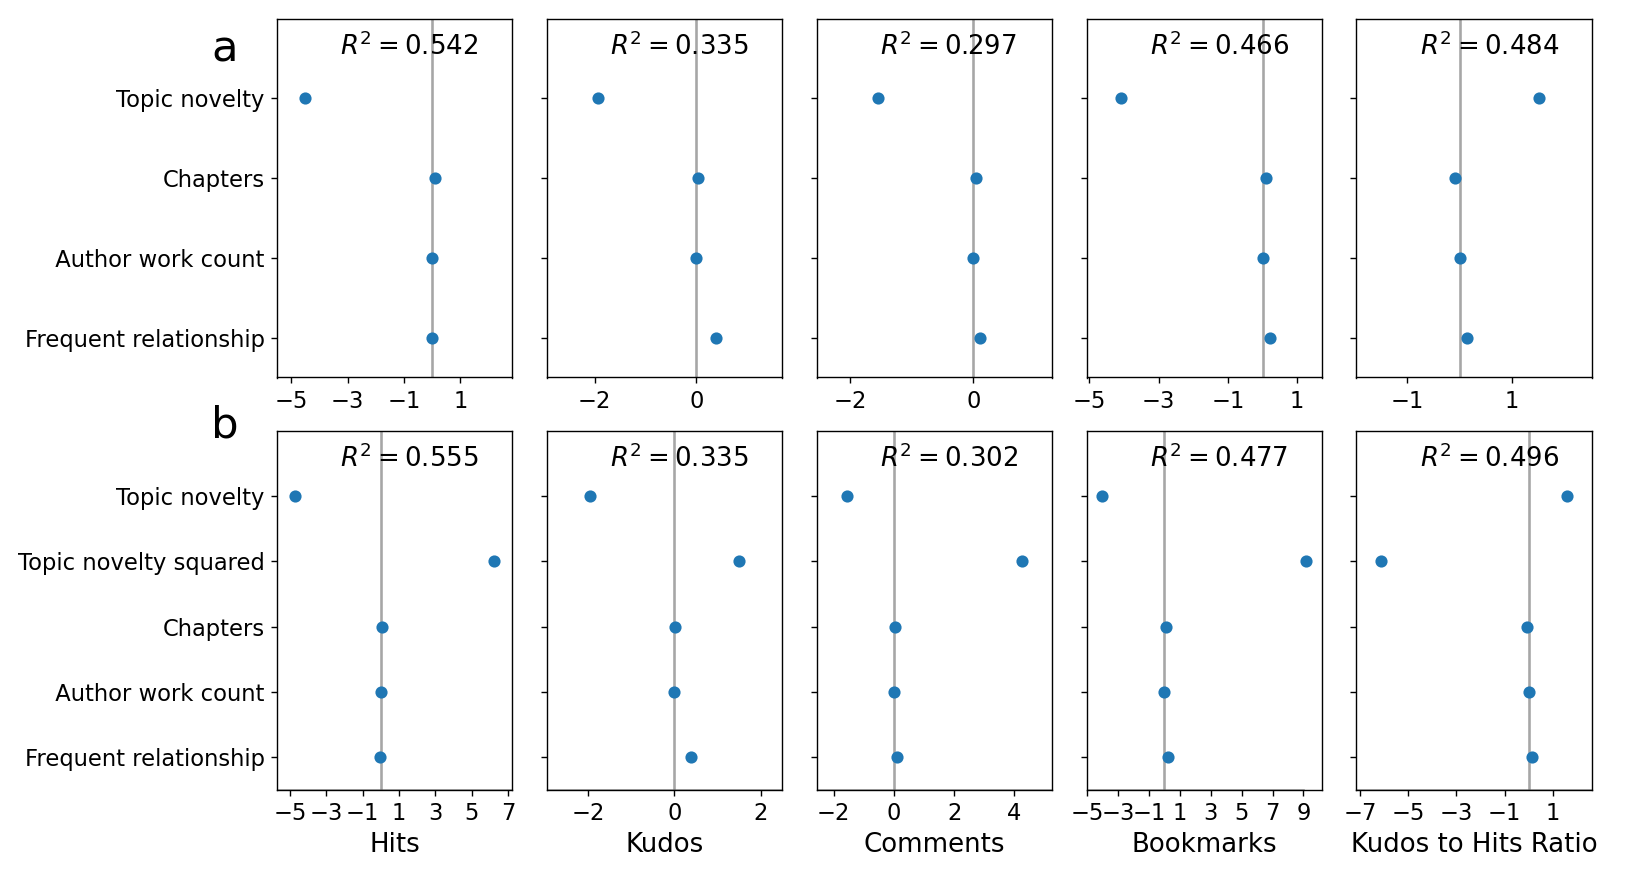

In [220]:
plot_fig(partial=True)

<IPython.core.display.Javascript object>


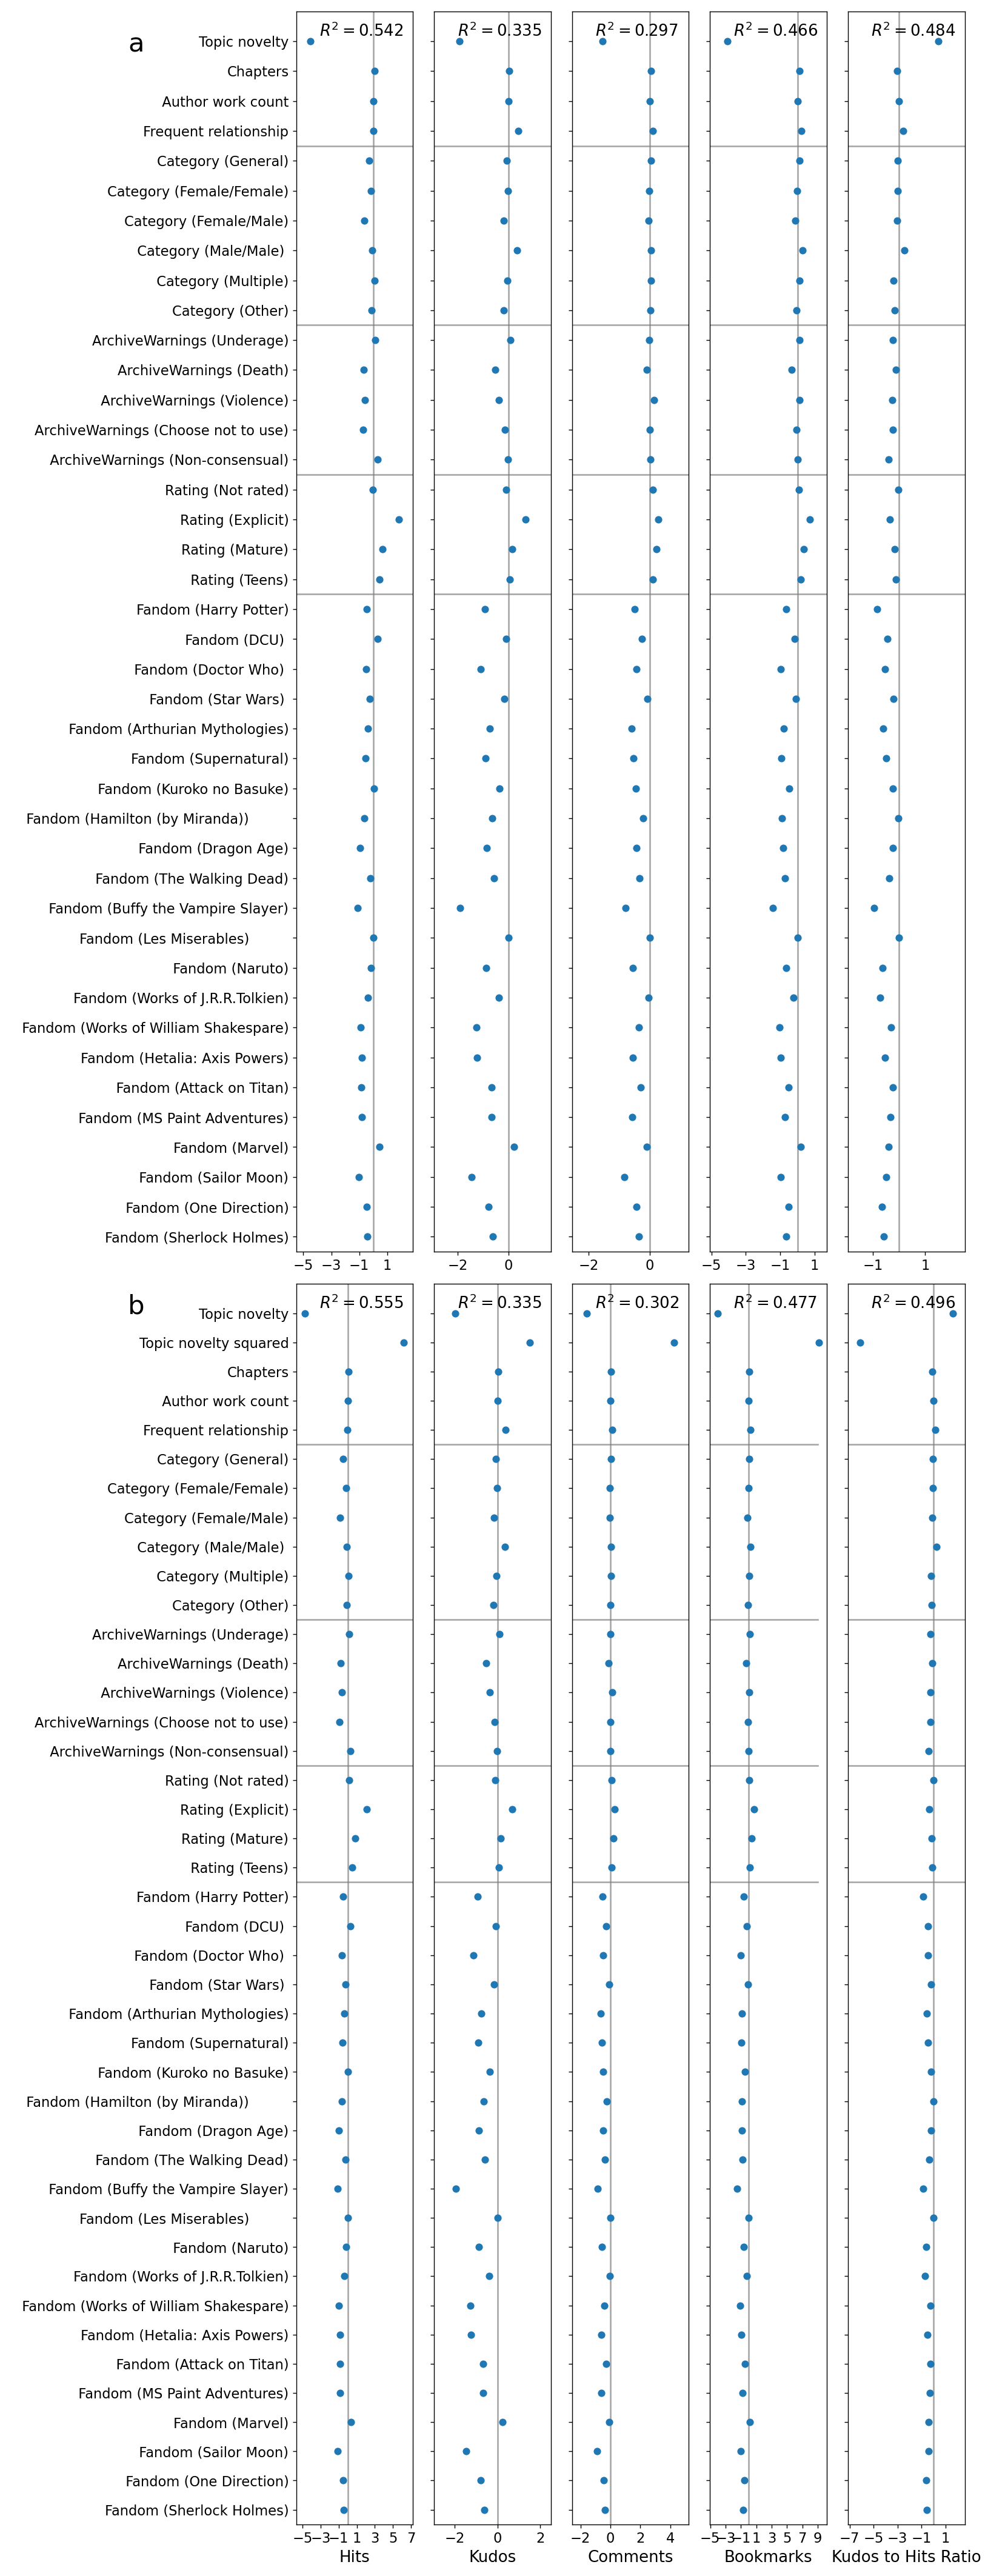

In [221]:
plot_fig(partial=False)